In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [5]:
centers = [[1,1],[-1,-1],[1,-1]]
X,labels_true = make_blobs(n_samples=750,centers=centers,cluster_std=0.4,random_state=0)
X

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       ...,
       [ 0.26798858, -1.27833405],
       [-0.88628813, -0.30293249],
       [ 0.60046048, -1.29605472]])

In [8]:
X = StandardScaler().fit_transform(X)

In [9]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [10]:
db = DBSCAN(eps=0.3,min_samples=10)

In [11]:
db.fit(X)

DBSCAN(eps=0.3, min_samples=10)

In [12]:
core_sample_mask = np.zeros_like(db.labels_,dtype=bool)

In [13]:
core_sample_mask[db.core_sample_indices_] = True

In [14]:
labels = db.labels_

In [15]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

In [16]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


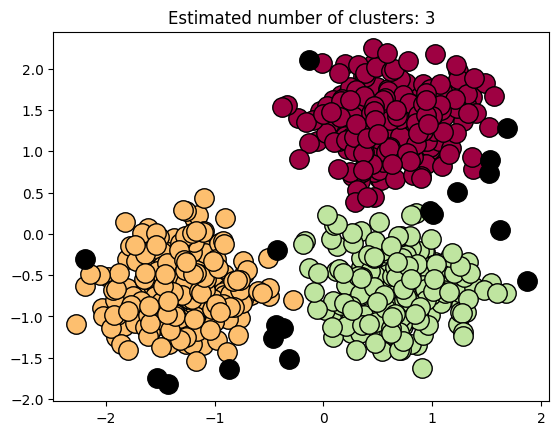

In [19]:
# Plot result
import matplotlib.pyplot as plt

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_sample_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_sample_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [22]:
#rand index
print(metrics.adjusted_rand_score(labels_true,labels))

0.9517085526151922


In [30]:
#jaccards coefficient
print(metrics.jaccard_score(labels_true,labels,average='weighted'))

0.9681274900398408


In [31]:
print(metrics.jaccard_score(labels_true,labels,average='micro'))

0.9455252918287937


In [32]:
print(metrics.jaccard_score(labels_true,labels,average='macro'))

0.7260956175298805
